<a href="https://colab.research.google.com/github/Alexander-1380/Yandex_practicum/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BE_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%D0%B0%D1%85_%D0%B8%D0%B3%D1%80_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82_%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сборный проект - Анализ данных о продажах игр интернет-магазина (проект выполнен в рамках обучения в Яндекс Практикуме)

### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


### Описание данных

<b>Name</b> — название игры<br>
<b>Platform</b> — платформа<br>
<b>Year_of_Release</b> — год выпуска<br>
<b>Genre</b> — жанр игры<br>
<b>NA_sales</b> — продажи в Северной Америке (миллионы проданных копий)<br>
<b>EU_sales</b> — продажи в Европе (миллионы проданных копий)<br>
<b>JP_sales</b> — продажи в Японии (миллионы проданных копий)<br>
<b>Other_sales</b> — продажи в других странах (миллионы проданных копий)<br>
<b>Critic_Score</b> — оценка критиков (максимум 100)<br>
<b>User_Score</b> — оценка пользователей (максимум 10)<br>
<b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>

Данные за 2016 год могут быть неполными.<br>

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [ ]:
try:
    games = pd.read_csv('/Users/alexander/Downloads/games.csv')
except:
    games = pd.read_csv('/Users/alex/Desktop/Yandex_projects/Сборный проект-1 (games)/games.csv')
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Шаг 2. Подготовьте данные
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

#### 2.1 Приведем названия всех столбцов к нижнему регистру

In [ ]:
for name in list(games.columns):
    games.rename(columns = {name: name.lower()}, inplace = True )
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### 2.2 Поменяем тип данных в следующих столбцах:
year_of_release - с float на int, тк годы должны быть выражены в целых числах,<br>
critic_score - с float на int, тк рейтинг должен быть выражен в целых числах,<br>
user_score - c object на float, тк оценки пользователей выражаются в числах с десятыми долями

In [ ]:
games = games.astype({'year_of_release': 'Int64', 'critic_score': 'Int64', 'user_score': 'float64'}, errors='ignore')
games.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score          object
rating              object
dtype: object

тип данных столбца "user_score" не поменялся. Видимо в нем помимо пропусков есть нечисловые значения, на которые нам намекнули в задании "Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей". Разберемся с этим позже.

#### 2.3 Обработка пропусков

Посмотрим, в каких столбцах какое процентное соотношение пропущенных данных относительно общего их количества

In [ ]:
pd.DataFrame(round(games.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


чемпион по пропускам - critic_score. посмотрим что в нем

In [ ]:
games.query('critic_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Кажется, что во всех (по крайней мере в большинстве) строках с пропусками в столбцах critic_score также пропуски и в столбцах user_score и rating. Проверим это.

In [ ]:
games.query('critic_score.isna() and rating.isna() and user_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Это так для 6621 из 8578 строк (~77%). Каких-либо еще закономерностей визуально обнаружить не удалось. Видимо для этих игр не были доступны ресурсы с рейтингами и оценками. Оставим эти пропуски как есть во избежание искажения данных.

Посмотрим на столбец year_of_release

In [ ]:
games.loc[(games['rating'].isna()), 'rating'] = 'Unknown'
games.query('rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [ ]:
games.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,Unknown
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,Unknown


Пропуски значений в столбце year_of_release составляю вс его 1,6% от датафрейма, удалим их безболезненно.

In [ ]:
games = games.dropna(subset='year_of_release')
games.query('year_of_release.isna()')

TypeError: Index(...) must be called with a collection of some kind, 'year_of_release' was passed

#### 2.4 Объясните, почему заполнили пропуски определённым образом или почему не стали это делать


Пропуски в столбце year_of_release составляли всего 1,6% от датафрейма, удалили их без вреда для исследования.<br> Пропуски в столбцах critic_score, user_score и rating пересекаются на 70% составляют от 40.5% до 51.3% от датафрейма, их удаление привело бы к искажению данных, принято решение оставить эти данные без иземенений.

In [ ]:
games = games.dropna(subset=['name', 'genre'])
games.query('name.isna() | genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### 2.5 Опишите причины, которые могли привести к пропускам

Пропуски в столбцах critic_score, user_score и rating пересекаются на 70%, предположим что для этих игр не были доступны ресурсы с рейтингами и оценками.<br>
Пропуски в столбце с year_of_release могли возникнуть из-за разных дат релиза игры в разных частях света.

#### 2.6 Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать

In [ ]:
games.query('user_score == "tbd"').head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,<NA>,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,<NA>,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,<NA>,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,<NA>,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,<NA>,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65,tbd,E


tbd - To Be Determined (как подсказывает гугл). то есть эти данные на данный момент не определены, возможно будут определены в будущем. Так как в таблице выше видим 1999 год, то вряд ли вообще стоит этого ожидать, потому заменим их на NaN

In [ ]:
games.loc[(games['user_score']=='tbd'), 'user_score'] = 'NaN'
games.query('user_score == "tbd"')

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь сможем поменять тип данных столбца user_score на float

In [ ]:
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


/tmp/ipykernel_31/4080586108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['user_score'] = games['user_score'].astype('float')


посмотрим на новое количество пропусков после добавления их в столбце user_score

In [ ]:
pd.DataFrame(round(games.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


#### 2.7 Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [ ]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,Unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,Unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,Unknown,0.01


проверим на наличие дубликатов

In [ ]:
games.duplicated().sum()

0

### Промежуточные выводы 1:

Для исследования предоставлен датафрейм о реализации игр из открытых источников, состоящий из 16715 строк и 11 колонок

Названия столбцов для удобства были приведены к нижнему регистру.<br>

В столбцах critic_score, user_score пропуски составляют 51.5% и 54.6% соответственно.<br>
Предположим что для этих игр не были доступны ресурсы с рейтингами и оценками. Данные с пропусками не были удалены во избежание искажения данных для исследования.<br>

Пропуски в столбце rating объединили в отдельную категорию 'Unknown'.

Пропуски в столбце year_of_release составляли 1,6%, они могли возникнуть из-за разных дат релиза игры в разных частях света. Эти данные были удалены без вреда для массива.<br>

Пропуски в столбцах name и genre составляли менее 0.0001%, могли возникнуть из-за ошибки в заполнении таблицы. Эти данные также были удалены без вреда для массива.<br>

Был добавлен столбец с данными по суммарным продажам игр во всех частях света.<br>

После удаления строк с пропусками получили датафрейм на 16 444 строк и 12 столбцов.<br>

### Описание данных

<b>name</b> — название игры<br>
<b>platform</b> — платформа<br>
<b>year_of_release</b> — год выпуска<br>
<b>genre</b> — жанр игры<br>
<b>na_sales</b> — продажи в Северной Америке (миллионы проданных копий)<br>
<b>eu_sales</b> — продажи в Европе (миллионы проданных копий)<br>
<b>jp_sales</b> — продажи в Японии (миллионы проданных копий)<br>
<b>other_sales</b> — продажи в других странах (миллионы проданных копий)<br>
<b>critic_score</b> — оценка критиков (максимум 100)<br>
<b>user_score</b> — оценка пользователей (максимум 10)<br>
<b>rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>
<b>total_sales</b> - суммарные продажи (миллионы проданных копий)<br>

### Шаг 3. Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?<br>
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?<br>
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.<br>
- Не учитывайте в работе данные за предыдущие годы.<br>
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.<br>
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.<br>
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.<br>
- Соотнесите выводы с продажами игр на других платформах.<br>
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?<br>

#### 3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посчитаем количество наблюдаемых лет, и построим гистограмму с соответствующим количеством корзин

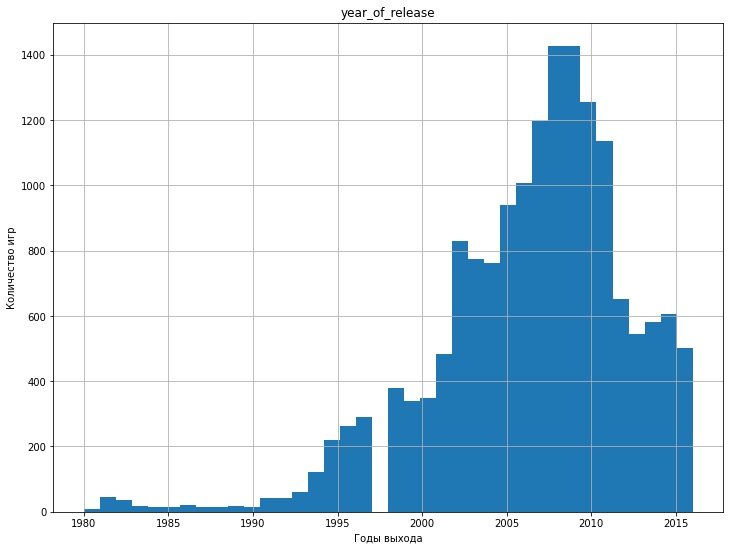

In [ ]:
bins_num = len(games['year_of_release'].unique())
games.hist('year_of_release', bins=bins_num, figsize=(12,9))
plt.xlabel('Годы выхода')
plt.ylabel('Количество игр')
plt.show()

Наблюдаем явный тренд роста количества выпускаемых игр с 1994 года. Наиболее важный для исследования период считаем с этого года.

In [ ]:
games_unique = games.drop_duplicates(subset=['name'])

bins_num = len(games_unique['year_of_release'].unique())

plt.figure(figsize=[15, 10])
plt.suptitle('Сранвение распределений выхода новых игр по годам', fontsize=19)

plt.subplot(1, 2, 1)
plt.hist(games['year_of_release'], bins=bins_num,)
plt.title('Выход игр на всех платформах по годам', fontsize=15)
plt.xlabel('Годы выхода')
plt.ylabel('Количество игр')
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(games_unique['year_of_release'], bins=bins_num)
plt.title('Выход уникальных игр по годам', fontsize=15)
plt.xlabel('Годы выхода')
plt.ylabel('Количество игр')
plt.grid()

plt.tight_layout()
plt.show()

#### 3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Найдем 10 платформ с наибольшим числом продаж

In [ ]:
platforms_top10 = (
    games.pivot_table(index='platform', values='total_sales', aggfunc='sum').
    sort_values(by='total_sales', ascending=False).head(10)
)
platforms_top10_list = list(platforms_top10.index)
print(platforms_top10, platforms_top10_list)

          total_sales
platform             
PS2           1255.77
X360           971.42
PS3            939.65
Wii            907.51
DS             806.12
PS             730.86
GBA            317.85
PS4            314.14
PSP            294.05
PC             259.52 ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']


In [ ]:
games_platform_top10 = games.query('platform in @platforms_top10_list')
games_platform_top10

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,Unknown,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,<NA>,NaN,Unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,Unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,Unknown,0.01


построим график изменения числа продаж по годам для этих 10-ти платформ

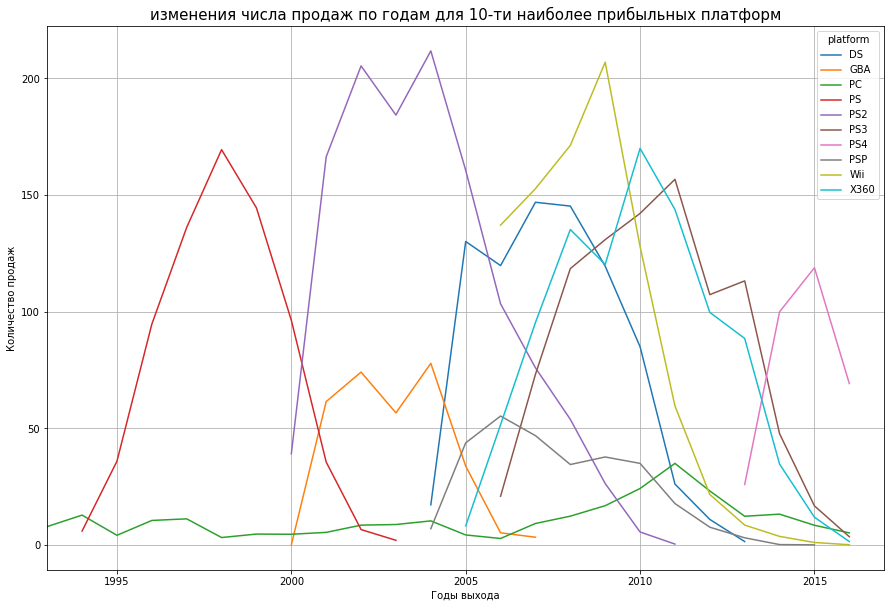

In [ ]:
games_platform_top10_pivot = (
    games_platform_top10.
    pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
)
games_platform_top10_pivot.plot(grid=True, figsize=(15,10), xlim=(1993,2017))
plt.title('изменения числа продаж по годам для 10-ти наиболее прибыльных платформ', fontsize=15)
plt.xlabel('Годы выхода')
plt.ylabel('Количество продаж')
plt.show()

Посчитаем характерный срок появления новых и исчезновения старых платформ. За характерый возьмем медиану сроков жизни рассмотренных 10-ти наиболее успешных платформ

In [ ]:
platform_life_period = []
for name in platforms_top10_list:
    period = (
        games_platform_top10.query('platform==@name')['year_of_release'].max() -
        games_platform_top10.query('platform==@name')['year_of_release'].min()
    )
    platform_life_period.append(period)
pd.DataFrame(platform_life_period).median()


0    10.5
dtype: float64

Появляются новые платформы и исчезают старые в среднем за 10 лет

#### 3.3 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Актуальный период возьмем с 2012 года, так как считаем, что именно эти данные помогут построить прогноз на 2017

#### 3.4 Не учитывайте в работе данные за предыдущие годы.

Отрежем от изначального датафрейма все данные начиная от 2012 года

In [ ]:
games_from_2000 = games.loc[games['year_of_release']>=2012, :]
games_from_2000

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,Unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,Unknown,0.01


#### 3.5 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [ ]:
(
    games_from_2000.pivot_table(index='platform', values='total_sales', aggfunc='sum').
    sort_values(by='total_sales', ascending=False)
)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


5 платформ - PS4, PS3, X360, 3DS, XOne - с большим отрывом лидируют по продажам

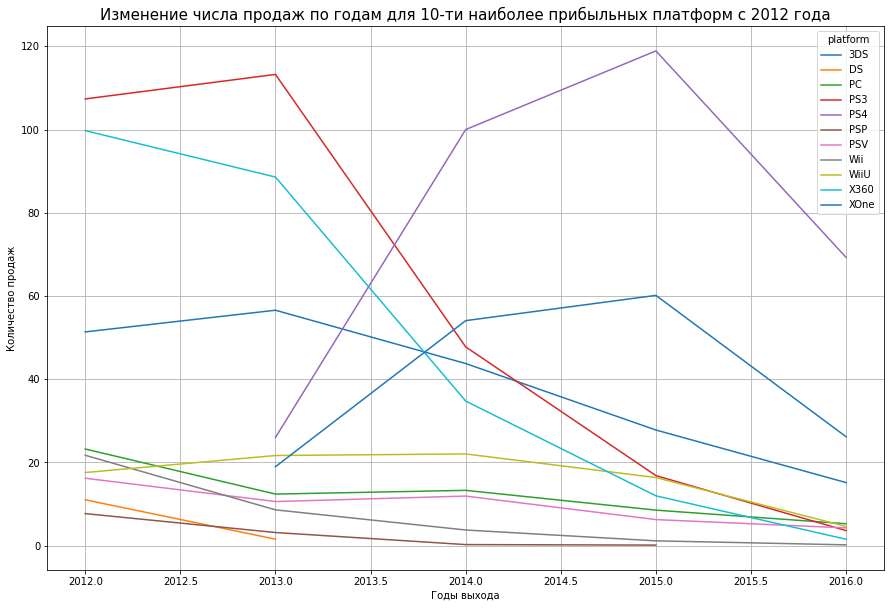

In [ ]:
(
    games_from_2000.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').
    plot(grid=True, figsize=(15,10))
)
plt.title('Изменение числа продаж по годам для 10-ти наиболее прибыльных платформ с 2012 года', fontsize=15)
plt.xlabel('Годы выхода')
plt.ylabel('Количество продаж')
plt.show()

На момент 2016 можем выделить 3 потенциально прибыльные платформы - PS4, XOne, 3DS. Они на момент 2016 года находятся дальше остальных от точки падения продаж.

#### 3.6 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

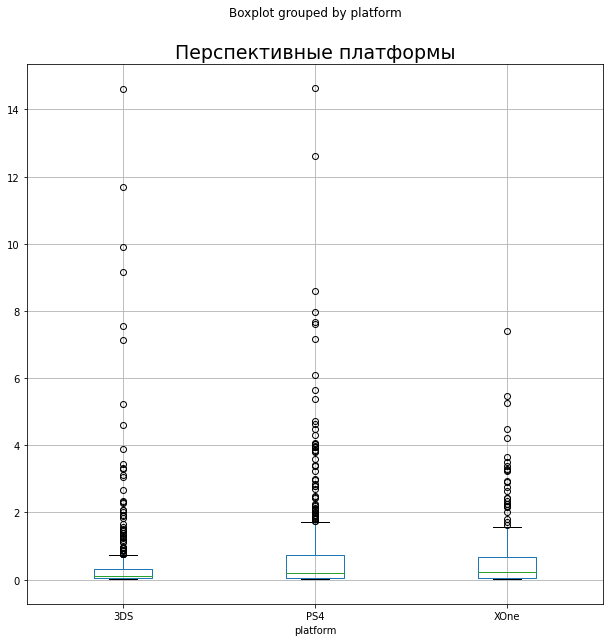

In [ ]:
perspective_platforms_list = ['PS4', 'XOne', '3DS']
games_from_2000_perspective_platforms = games_from_2000.query('platform in @perspective_platforms_list')
(
    games_from_2000_perspective_platforms.
    boxplot(column='total_sales', by='platform', figsize=(10,10), grid=True)
)
plt.title('Перспективные платформы', fontsize=19)
plt.show()

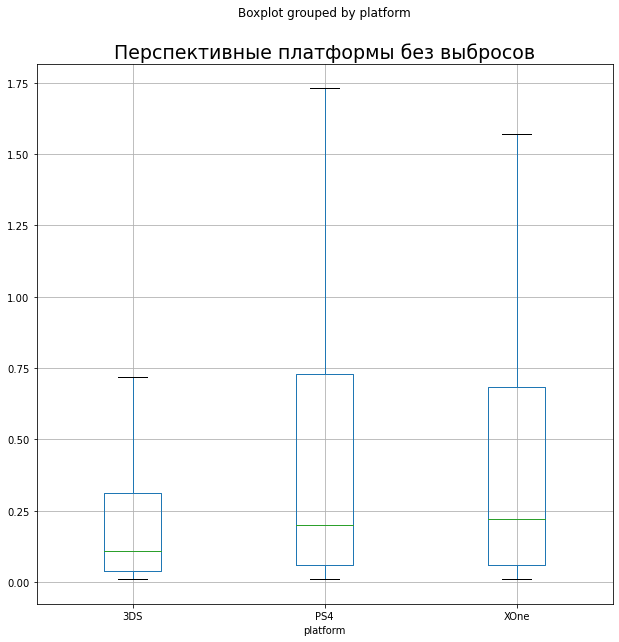


 platform PS4

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
5%         0.015500
50%        0.200000
95%        3.910500
max       14.630000
Name: total_sales, dtype: float64

 platform XOne

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
5%         0.010000
50%        0.220000
95%        2.872000
max        7.390000
Name: total_sales, dtype: float64

 platform 3DS

count    396.000000
mean       0.491439
std        1.387161
min        0.010000
5%         0.010000
50%        0.110000
95%        2.032500
max       14.600000
Name: total_sales, dtype: float64


In [ ]:
(
    games_from_2000_perspective_platforms.
    boxplot(column='total_sales', by='platform', sym='', figsize=(10,10), grid=True)
)
plt.title('Перспективные платформы без выбросов', fontsize=19)
plt.show()

for name in perspective_platforms_list:
    print(f'\n platform {name}\n')
    print(
        games_from_2000_perspective_platforms.
        loc[games_from_2000_perspective_platforms['platform']==name, 'total_sales'].
        describe(percentiles=[.05, .5, .95])
    )

#### для платформы 3DS<br>
медианное значение продаж 0.11 млн<br>
50% значений лежат в интервале от 0.04 до 0.31 млн<br>
90% значений лежат в интервале от 0.01 до 2.03 млн<br>

#### для платформы PS4<br>
медианное значение продаж 0.2 млн<br>
50% значений лежат в интервале от 0.06 до 0.73 млн<br>
90% значений лежат в интервале от 0.016 до 3.91 млн<br>

#### для платформы XOne<br>
медианное значение продаж 0.22 млн<br>
50% значений лежат в интервале от 0.06 до 0.69 млн<br>
90% значений лежат в интервале от 0.01 до 2.87 млн<br>

Наблюдаем, что разбросы значений продаж игр для 3-х выбранных нами перспективных платформ от минимумов до максимумов лежат от 0 до 1.75 млн. При этом у всех трех наблюдаем значения-выбросы, которые значительно (до семи раз) превышают наблюдаемые максимальные значения. Объяснить это можно тем, что каждая такая платформа иногда выспускает сверх-успешные игры, продажи которых наибольшим образом влияют на общую сумму продаж платформы. Доля таких игр не более 10% от всех выпускаемых на платформе.

#### 3.7 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

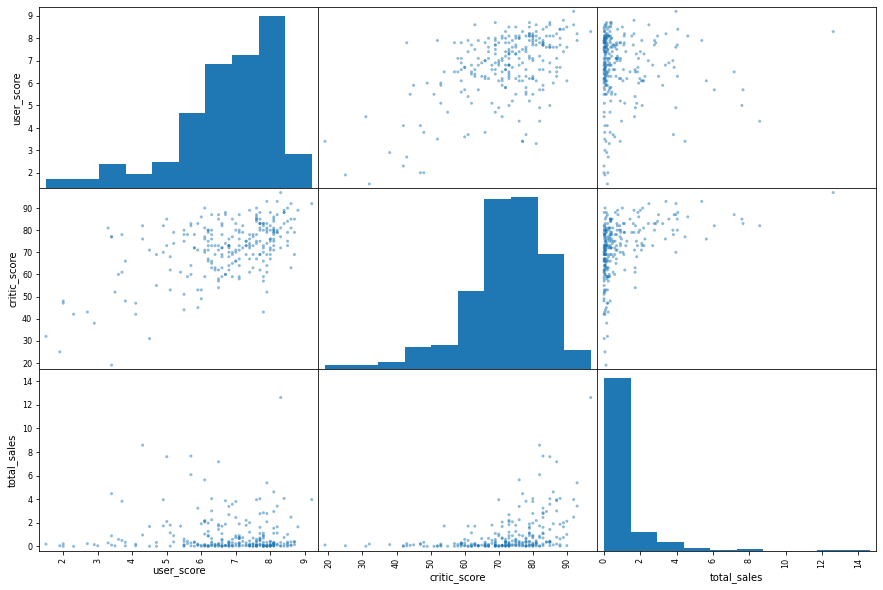

              user_score  critic_score  total_sales
user_score      1.000000      0.557654    -0.031957
critic_score    0.557654      1.000000     0.406568
total_sales    -0.031957      0.406568     1.000000


In [ ]:
games_from_2000_PS4 = games_from_2000.query('platform=="PS4"')
pd.plotting.scatter_matrix(games_from_2000_PS4[['user_score', 'critic_score', 'total_sales']], figsize=(15,10))

plt.show()
print(games_from_2000_PS4[['user_score', 'critic_score', 'total_sales']].corr())

Корреляция между оценками пользователей и продажами отсутствует
Наблюдается слабая корреляция между оценками критиков и продажами. Коэффициент 0.41

#### 3.8 Соотнесите выводы с продажами игр на других платформах.

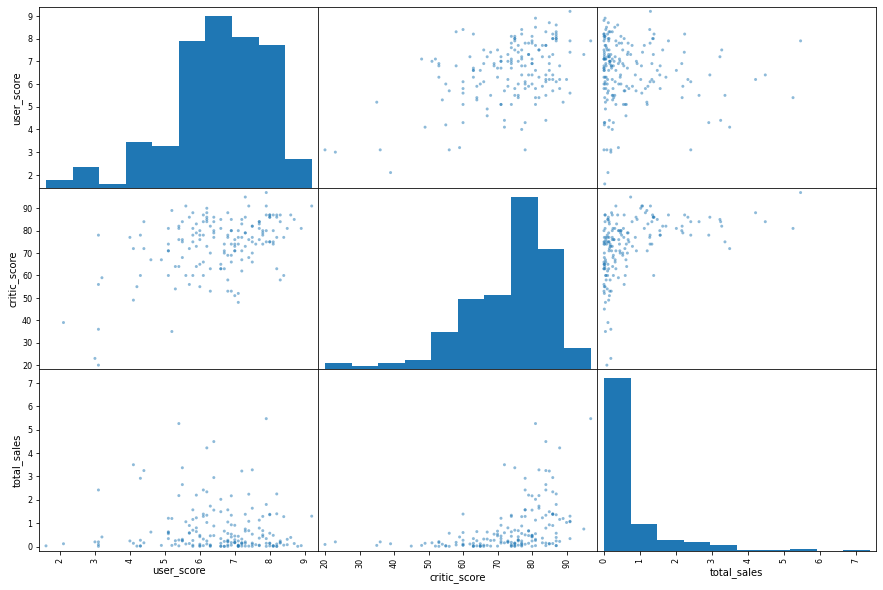

              user_score  critic_score  total_sales
user_score      1.000000      0.472462    -0.068925
critic_score    0.472462      1.000000     0.416998
total_sales    -0.068925      0.416998     1.000000


In [ ]:
games_from_2000_XOne = games_from_2000.query('platform=="XOne"')
pd.plotting.scatter_matrix(games_from_2000_XOne[['user_score', 'critic_score', 'total_sales']], figsize=(15,10))
plt.show()
print(games_from_2000_XOne[['user_score', 'critic_score', 'total_sales']].corr())

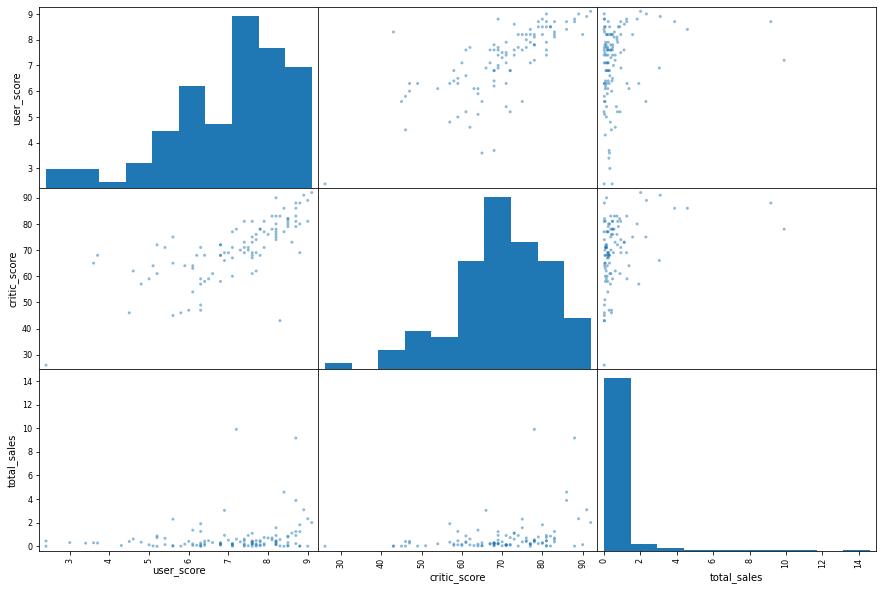

              user_score  critic_score  total_sales
user_score      1.000000      0.722762     0.197583
critic_score    0.722762      1.000000     0.320803
total_sales     0.197583      0.320803     1.000000


In [ ]:
games_from_2000_3DS = games_from_2000.query('platform=="3DS"')
pd.plotting.scatter_matrix(games_from_2000_3DS[['user_score', 'critic_score', 'total_sales']], figsize=(15,10))
plt.show()
print(games_from_2000_3DS[['user_score', 'critic_score', 'total_sales']].corr())

В случае с платформами XOne и 3DS наблюдается схожая картина. Корреляция между рейтингами пользователей и продажами отсутствет, а между рейтингами критиков и продажами присутствует слабая (коэффициенты для XOne - 0.42, для 3DS - 0.39)

#### 3.9 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Создадим сводную таблицу, переименуем столбцы и удалим лишний. Оставим количество игр и продаж в каждом жанре. Построим график.

In [ ]:
games_by_genres_pivot = (
    games_from_2000.pivot_table(index='genre', values=['name', 'total_sales'], aggfunc=['count', 'sum'])
)

games_by_genres_pivot.columns = ['games_count', 'sales_count', 'total_sales']
games_by_genres_pivot = games_by_genres_pivot[['games_count', 'total_sales']]
games_by_genres_pivot

,games_count,total_sales
genre,,
Action,1031,441.12
Adventure,302,29.43
Fighting,109,44.49
Misc,192,85.04
Platform,85,61.00
Puzzle,28,4.89
Racing,115,53.50
Role-Playing,370,192.80
Shooter,235,304.73


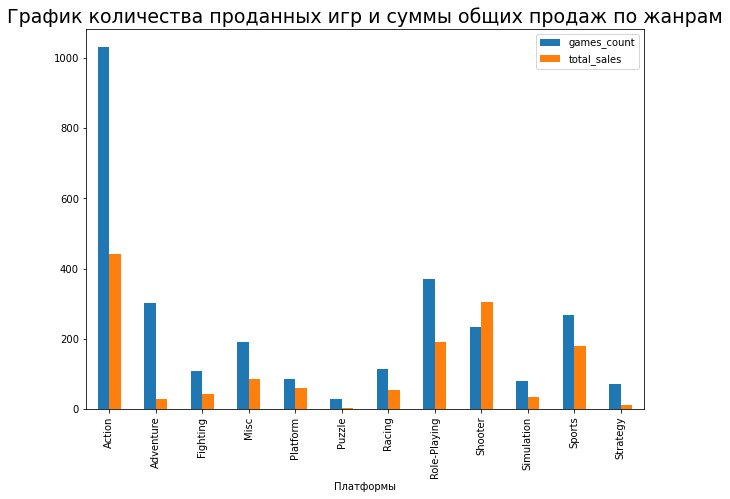

In [ ]:
games_by_genres_pivot.plot(kind='bar', figsize=(10,7))
plt.title('График количества проданных игр и суммы общих продаж по жанрам', fontsize=19)
plt.xlabel('Платформы')
plt.show()

Наиболее распространенный жанр игр - Action. Наименее распространенный - Puzzle.

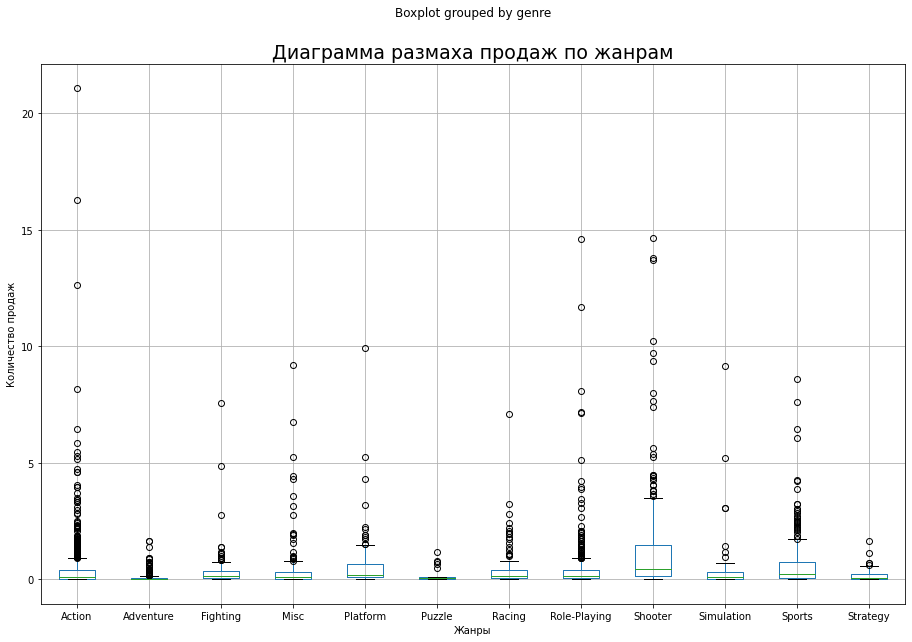

In [ ]:
games_from_2000.boxplot(column='total_sales', by='genre', figsize=(15,10), grid=True)
plt.title('Диаграмма размаха продаж по жанрам', fontsize=19)
plt.xlabel('Жанры')
plt.ylabel('Количество продаж')
plt.show()


Видим что на жанр Action приходится наибольшее количество сильных выбросов.
Теперь построим тот же график без учета выбросов


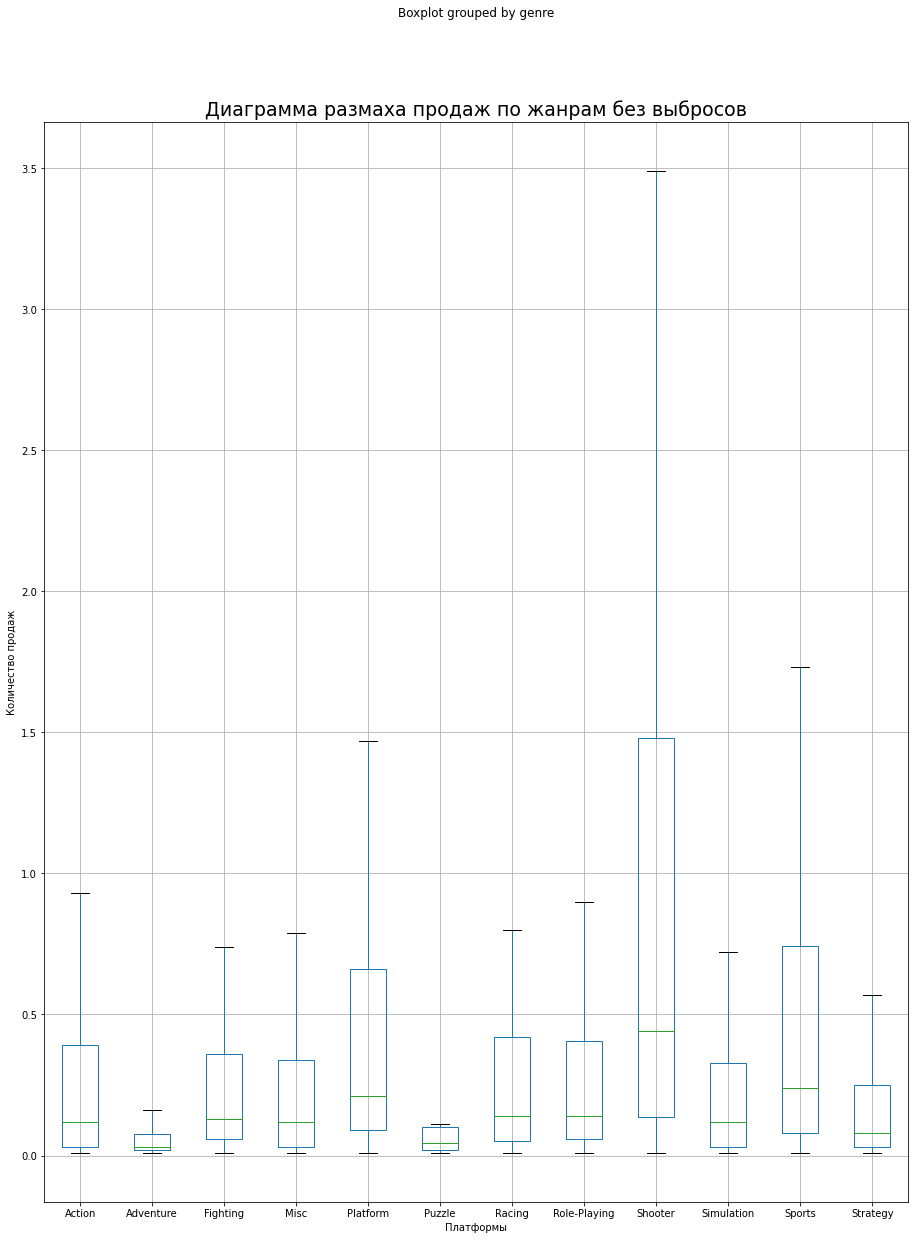

In [ ]:
games_from_2000.boxplot(column='total_sales', by='genre', sym="", figsize=(15,20), grid=True)
plt.title('Диаграмма размаха продаж по жанрам без выбросов', fontsize=19)
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.show()


Исходя из медианного значения продаж самый стабильно прибыльный жанр - Shooter. А самый стабильно неприбыльный - Adventure.
Предыдущие варианты посчитанные исходя из суммарных продаж получились таковыми из-за наличия выбросов в жанрах Action и Puzzle. Оценка по медиане более надежная.


### Промежуточные выводы 2

Наблюдаем явный тренд роста количества выпускаемых игр с 1994 года. Наиболее важный для исследования период считаем с этого года.<br>

Среди 10 платформ с наибольшим числом продаж новые платформы появляются и исчезают старые в среднем за период в 10 лет.<br>

Актуальный период возьмем с 2012 года, так как считаем, что именно эти данные помогут построить прогноз на 2017.<br>

5 платформ - PS4, PS3, X360, 3DS, XOne - с большим отрывом лидируют по продажам.<br>

На момент 2016 можем выделить 3 потенциально прибыльные платформы - PS4, XOne, 3DS. Они находятся дальше остальных от точки падения продаж.<br>

#### для платформы 3DS<br>
медианное значение продаж 0.11 млн<br>
50% значений лежат в интервале от 0.04 до 0.31 млн<br>
90% значений лежат в интервале от 0.01 до 2.03 млн<br>

#### для платформы PS4<br>
медианное значение продаж 0.2 млн<br>
50% значений лежат в интервале от 0.06 до 0.73 млн<br>
90% значений лежат в интервале от 0.016 до 3.91 млн<br>

#### для платформы XOne<br>
медианное значение продаж 0.22 млн<br>
50% значений лежат в интервале от 0.06 до 0.69 млн<br>
90% значений лежат в интервале от 0.01 до 2.87 млн<br>

Наблюдаем, что разбросы значений продаж игр для 3-х выбранных нами перспективных платформ от минимумов до максимумов лежат от 0 до 1.75 млн. При этом у всех трех наблюдаем значения-выбросы, которые значительно (до семи раз) превышают наблюдаемые максимальные значения. Объяснить это можно тем, что каждая такая платформа иногда выспускает сверх-успешные игры, продажи которых наибольшим образом влияют на общую сумму продаж платформы. Доля таких игр не более 10% от всех выпускаемых на платформе.<br>

Корреляция между оценками пользователей и продажами отсутствует.<br>
Наблюдается слабая корреляция между оценками критиков и продажами. Коэффициент 0.41.<br>

В случае с платформами XOne и 3DS наблюдается схожая картина. Корреляция между рейтингами пользователей и продажами отсутствет, а между рейтингами критиков и продажами присутствует слабая (коэффициенты для XOne - 0.42, для 3DS - 0.39).<br>

Наиболее распространенный жанр игр - Action. Наименее распространенный - Puzzle.<br>
Исходя из медианного значения продаж самый стабильно прибыльный жанр - Shooter. А самый стабильно неприбыльный - Adventure.<br>

### Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):<br>
Самые популярные платформы (топ-5). Опишите различия в долях продаж.<br>
Самые популярные жанры (топ-5). Поясните разницу.<br>
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### 4.1 Самые популярные платформы (топ-5). Опишите различия в долях продаж.

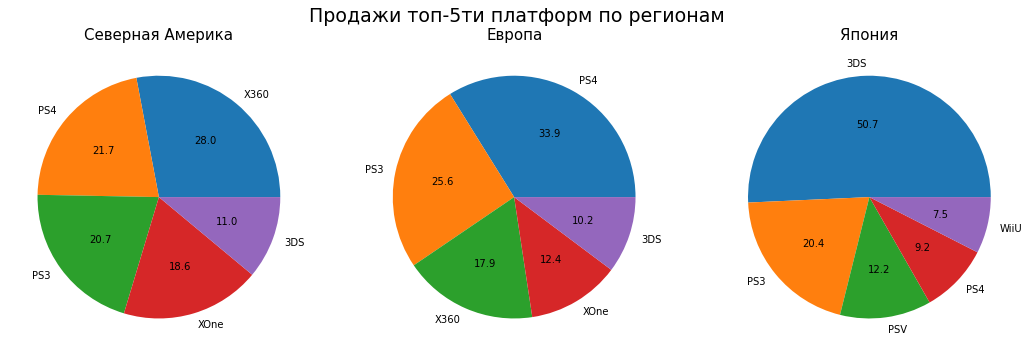

In [ ]:
games_from_2000_na = (
    games_from_2000.pivot_table(index='platform', values='na_sales', aggfunc='sum').
    sort_values(by='na_sales', ascending=False).head()
)

games_from_2000_eu = (
    games_from_2000.pivot_table(index='platform', values='eu_sales', aggfunc='sum').
    sort_values(by='eu_sales', ascending=False).head()
)

games_from_2000_jp = (
    games_from_2000.pivot_table(index='platform', values='jp_sales', aggfunc='sum').
    sort_values(by='jp_sales', ascending=False).head()
)

plt.figure(figsize=[15, 5])
plt.suptitle('Продажи топ-5ти платформ по регионам', fontsize=19)

plt.subplot(1, 3, 1)
plt.pie(games_from_2000_na['na_sales'], labels=games_from_2000_na.index, autopct='%.1f')
plt.title('Северная Америка', fontsize=15)

plt.subplot(1, 3, 2)
plt.pie(games_from_2000_eu['eu_sales'], labels=games_from_2000_eu.index, autopct='%.1f')
plt.title('Европа', fontsize=15)

plt.subplot(1, 3, 3)
plt.pie(games_from_2000_jp['jp_sales'], labels=games_from_2000_jp.index, autopct='%.1f')
plt.title('Япония', fontsize=15)

plt.tight_layout()
plt.show()

В регионе Северная Америка доли продаж топ-5 популярных платформ выглядит следующим образом:
1. X360 - 24.6%<br>
2. PS2  - 23.6%<br>
3. Wii  - 20.1%<br>
4. PS3  - 16.1%<br>
5. DS   - 15.7%<br>

Для региона Европейский Союз:
1. PS2  - 24.2%<br>
2. PS3  - 23.8%<br>
3. X360 - 19.5%<br>
4. Wii  - 18.8%<br>
5. DS   - 13.7%<br>

Для региона Япония:
1. DS  - 30.8%<br>
2. PS2 - 24.2%<br>
3. 3DS - 17.7%<br>
4. PS3 - 14.0%<br>
5. PSP - 13.3%<br>

в Северной Америке и Европейском союзе состав топ-5 популярных платформ одинаков с небольшими отличиями в распределении. В Японии же 2 платформы из топ 5 другие, при этом самая популярная платформа DS (на последнем месте в топ-5 в СА и ЕС)

#### 4.2 Самые популярные жанры (топ-5). Поясните разницу.

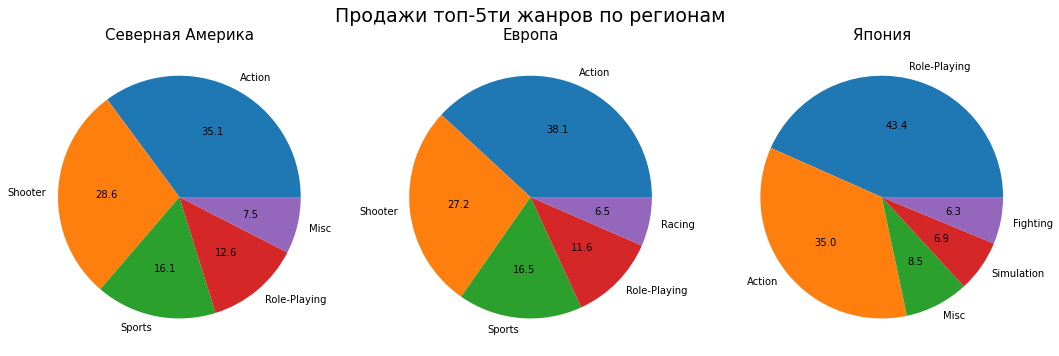

In [ ]:
games_from_2000_na_genre = (
    games_from_2000.pivot_table(index='genre', values='na_sales', aggfunc='sum').
    sort_values(by='na_sales', ascending=False).head()
)

games_from_2000_eu_genre = (
    games_from_2000.pivot_table(index='genre', values='eu_sales', aggfunc='sum').
    sort_values(by='eu_sales', ascending=False).head()
)

games_from_2000_jp_genre = (
    games_from_2000.pivot_table(index='genre', values='jp_sales', aggfunc='sum').
    sort_values(by='jp_sales', ascending=False).head()
)

plt.figure(figsize=[15, 5])
plt.suptitle('Продажи топ-5ти жанров по регионам', fontsize=19)

plt.subplot(1, 3, 1)
plt.pie(games_from_2000_na_genre['na_sales'], labels=games_from_2000_na_genre.index, autopct='%.1f')
plt.title('Северная Америка', fontsize=15)

plt.subplot(1, 3, 2)
plt.pie(games_from_2000_eu_genre['eu_sales'], labels=games_from_2000_eu_genre.index, autopct='%.1f')
plt.title('Европа', fontsize=15)

plt.subplot(1, 3, 3)
plt.pie(games_from_2000_jp_genre['jp_sales'], labels=games_from_2000_jp_genre.index, autopct='%.1f')
plt.title('Япония', fontsize=15)

plt.tight_layout()
plt.show()


В регионе Северная Америка доли продаж топ-5 популярных жанров игр выглядит следующим образом:
1. Action - 30.3%<br>
2. Sports - 23.7%<br>
3. Shooter - 19.9%<br>
4. Role-playing - 14.7%<br>
5. Misc - 11.4%<br>

Для региона Европейский союз:
1. Action - 31.3%<br>
2. Sports - 22.8%<br>
3. Shooter - 19.7%<br>
4. Misc - 13.2%<br>
5. Racing - 12.9%<br>

Для региона Япония:
1. Role-playing - 40.9%<br>
2. Action - 22.4%<br>
3. Misc - 14.5%<br>
4. Sports - 12.8%<br>
5. Platform - 9.4%<br>

Жанровые предпочтения геймеров Северной Америки мало отличаются от предпочтений геймеров Европейского союза за исключением того, что на 5-м месте у американцев Role-playing (РПГ), а у европейцев Racing (гонки). Япония показывает сильное отличие жанровых предпочтений, подвляющее большинство геймеров здесь предпочитает покупать РПГ.

#### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02
Unknown,91.50,108.84,103.31


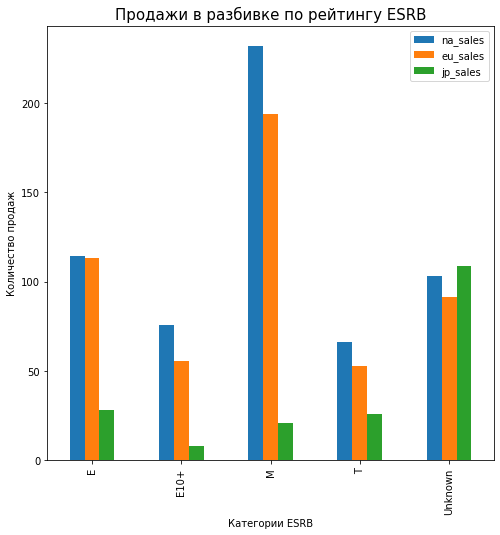

In [ ]:
games_from_2000_esrb = (
    games_from_2000.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)
display(games_from_2000_esrb)
games_from_2000_esrb.plot(kind='bar', y=['na_sales', 'eu_sales', 'jp_sales'], figsize=(8,8))
plt.title('Продажи в разбивке по рейтингу ESRB', fontsize=15)
plt.xlabel('Категории ESRB')
plt.ylabel('Количество продаж')
plt.show()

Наблюдаем влияние рейтинга ESRB на количество продаж в каждом регионе.<br>

Наибольшее число продаж в Северной Америке и Европе у игр с рейтингом M (Mature, 17+ лет).<br>
Наименьшее число продаж в Северной Америке и Европе у игр с рейтингом T (Teen, 13+ лет).<br>
Наибольшее число продаж в Японии у игр с незаполненным рейтингом. Объяснить это можно наличием в Японии собственной системы рейтингов - CERO, которая присваивает играм рейтинги со значительным отличием от категории системы ESRB, поэтому заполнение этих категорий для пользователей из Японии не так важно. <br>
Наименьшее тчисло продаж в Японии у игр с рейтингом Е10+ (от 10 лет).

### Промежуточные выводы 3

#### Топ-5 популярных платформ
В регионе Северная Америка доли продаж топ-5 популярных платформ выглядит следующим образом:
1. X360 - 24.6%<br>
2. PS2  - 23.6%<br>
3. Wii  - 20.1%<br>
4. PS3  - 16.1%<br>
5. DS   - 15.7%<br>

Для региона Европейский Союз:
1. PS2  - 24.2%<br>
2. PS3  - 23.8%<br>
3. X360 - 19.5%<br>
4. Wii  - 18.8%<br>
5. DS   - 13.7%<br>

Для региона Япония:
1. DS  - 30.8%<br>
2. PS2 - 24.2%<br>
3. 3DS - 17.7%<br>
4. PS3 - 14.0%<br>
5. PSP - 13.3%<br>

в Северной Америке и Европейском союзе состав топ-5 популярных платформ одинаков с небольшими отличиями в распределении. В Японии же 2 платформы из топ 5 другие, при этом самая популярная платформа DS (на последнем месте в топ-5 в СА и ЕС)

#### Жанровые предпочтения
В регионе Северная Америка доли продаж топ-5 популярных жанров игр выглядит следующим образом:
1. Action - 30.3%<br>
2. Sports - 23.7%<br>
3. Shooter - 19.9%<br>
4. Role-playing - 14.7%<br>
5. Misc - 11.4%<br>

Для региона Европейский союз:
1. Action - 31.3%<br>
2. Sports - 22.8%<br>
3. Shooter - 19.7%<br>
4. Misc - 13.2%<br>
5. Racing - 12.9%<br>

Для региона Япония:
1. Role-playing - 40.9%<br>
2. Action - 22.4%<br>
3. Misc - 14.5%<br>
4. Sports - 12.8%<br>
5. Platform - 9.4%<br>

Жанровые предпочтения геймеров Северной Америки мало отличаются от предпочтений геймеров Европейского союза за исключением того, что на 5-м месте у американцев Role-playing (РПГ), а у европейцев Racing (гонки). Япония показывает сильное отличие жанровых предпочтений, подвляющее большинство геймеров здесь предпочитает покупать РПГ.

#### Влияние рейтинга ESRB на количество продаж.
Наблюдаем влияние рейтинга ESRB на количество продаж в каждом регионе. Наибольшее число продаж во всех регионах у игр с рейтингом E (Everyone, наибольшая по численности группа), наименьшее также во всех регионах у игр с рейтингом Е10+ (от 10 лет).

### Шаг 5. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;<br>
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.<br>

Задайте самостоятельно пороговое значение alpha.

Поясните:<br>
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

#### 5.1 Гипотеза 01: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC равны<br>
Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [ ]:
user_scores_XOne = games_from_2000.loc[games_from_2000['platform']=='XOne', 'user_score']
user_scores_XOne = user_scores_XOne.dropna()

user_scores_PC = games_from_2000.loc[games_from_2000['platform']=='PC', 'user_score']
user_scores_PC = user_scores_PC.dropna()

print(user_scores_XOne.mean())
print(user_scores_PC.mean())

6.52142857142857
6.428640776699027


In [ ]:
alpha = .05

results = st.ttest_ind(user_scores_XOne, user_scores_PC, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Вывод: согласно исследованию, гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны не подтвердилась.

####  5.2 Гипотеза 02: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports равны.<br>
Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports не равны.<br>

Считаем, что имеющиеся у нас данные по пользовательским рейингам жанров Action и Sports - это выборки из неких недоступных генеральных совокупностей.

Зададим уровень значимости 5% и проверим c помощью t-критерия Пирсона вероятность того, что средние значения генеральных совокупностей равны. Дисперсии двух выборок не считаем равными.

In [ ]:
user_scores_action = games_from_2000.loc[games_from_2000['genre']=='Action', 'user_score']
user_scores_action = user_scores_action.dropna()

user_scores_sports = games_from_2000.loc[games_from_2000['genre']=='Sports', 'user_score']
user_scores_sports = user_scores_sports.dropna()

print(user_scores_action.mean())
print(user_scores_sports.mean())

6.825047801147237
5.455897435897437


In [ ]:
alpha = .05

results = st.ttest_ind(user_scores_action, user_scores_sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Вывод: согласно исследованию, гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports не равны не подтвердилась. Скорее всего, средние значения равны.

### Шаг 6. Общий вывод:


Для исследования предоставлен датафрейм о реализации игр из открытых источников, состоящий из 16715 строк и 11 колонок

Названия столбцов для удобства были приведены к нижнему регистру.<br>

В столбцах critic_score, user_score пропуски составляют 51.5% и 54.6% соответственно.<br>
Предположим что для этих игр не были доступны ресурсы с рейтингами и оценками. Данные с пропусками не были удалены во избежание искажения данных для исследования.<br>

Пропуски в столбце rating объединили в отдельную категорию 'Unknown'.

Пропуски в столбце year_of_release составляли 1,6%, они могли возникнуть из-за разных дат релиза игры в разных частях света. Эти данные были удалены без вреда для массива.<br>

Пропуски в столбцах name и genre составляли менее 0.0001%, могли возникнуть из-за ошибки в заполнении таблицы. Эти данные также были удалены без вреда для массива.<br>

Был добавлен столбец с данными по суммарным продажам игр во всех частях света.<br>

После удаления строк с пропусками получили датафрейм на 16 444 строк и 12 столбцов.<br>

### Описание данных

<b>name</b> — название игры<br>
<b>platform</b> — платформа<br>
<b>year_of_release</b> — год выпуска<br>
<b>genre</b> — жанр игры<br>
<b>na_sales</b> — продажи в Северной Америке (миллионы проданных копий)<br>
<b>eu_sales</b> — продажи в Европе (миллионы проданных копий)<br>
<b>jp_sales</b> — продажи в Японии (миллионы проданных копий)<br>
<b>other_sales</b> — продажи в других странах (миллионы проданных копий)<br>
<b>critic_score</b> — оценка критиков (максимум 100)<br>
<b>user_score</b> — оценка пользователей (максимум 10)<br>
<b>rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>
<b>total_sales</b> - суммарные продажи (миллионы проданных копий)<br>

Наблюдаем явный тренд роста количества выпускаемых игр с 1994 года. Наиболее важный для исследования период считаем с этого года.<br>

Среди 10 платформ с наибольшим числом продаж новые платформы появляются и исчезают старые в среднем за период в 10 лет.<br>

Актуальный период возьмем с 2000 года, так как из рассмотренных выше 10-ти наиболее успешных платформ 9 появились после 2000г. Считаем, что именно эти данные помогут построить прогноз на 2017.<br>

На момент 2016 года мы не наблюдаем растущих платформ вообще. Все платформы, даже самые прибыльные, находятся в фазе уменьшения продаж. Потенциально прибыльные можем выделить 3 - PS4, XOne, 3DS. Они на момент 2016 года находятся дальше остальных от точки падения продаж.<br>

Наблюдаем, что разбросы значений продаж игр для 3-х выбранных нами перспективных платформ от минимумов до максимумов лежат от 0 до 2 млн. При этом у всех трех наблюдаем значения-выбросы, которые значительно (до семи раз) превышают наблюдаемые максимальные значения. Объяснить это можно тем, что каждая такая платформа иногда выспускает сверх-успешные игры, продажи которых наибольшим образом влияют на общую сумму продаж платформы. Доля таких игр не более 10% от всех выпускаемых на платформе.<br>

Корреляция между оценками пользователей и продажами отсутствует
Наблюдается слабая корреляция между оценками критиков и продажами. Коэффициент 0.41

В случае с платформами XOne и 3DS наблюдается схожая картина. Корреляция между рейтингами пользователей и продажами отсутствет, а между рейтингами критиков и продажами присутствует слабая (коэффициенты для XOne - 0.42, для 3DS - 0.39).

Наиболее распространенный и прибыльный жанр игр - Action. Наименее распространенный и он же наименее прибыльный - Puzzle.


### Топ-5 популярных платформ
В регионе Северная Америка доли продаж топ-5 популярных платформ выглядит следующим образом:
1. X360 - 24.6%<br>
2. PS2  - 23.6%<br>
3. Wii  - 20.1%<br>
4. PS3  - 16.1%<br>
5. DS   - 15.7%<br>

Для региона Европейский Союз:
1. PS2  - 24.2%<br>
2. PS3  - 23.8%<br>
3. X360 - 19.5%<br>
4. Wii  - 18.8%<br>
5. DS   - 13.7%<br>

Для региона Япония:
1. DS  - 30.8%<br>
2. PS2 - 24.2%<br>
3. 3DS - 17.7%<br>
4. PS3 - 14.0%<br>
5. PSP - 13.3%<br>

в Северной Америке и Европейском союзе состав топ-5 популярных платформ одинаков с небольшими отличиями в распределении. В Японии же 2 платформы из топ 5 другие, при этом самая популярная платформа DS (на последнем месте в топ-5 в СА и ЕС)

### Жанровые предпочтения
В регионе Северная Америка доли продаж топ-5 популярных жанров игр выглядит следующим образом:
1. Action - 30.3%<br>
2. Sports - 23.7%<br>
3. Shooter - 19.9%<br>
4. Role-playing - 14.7%<br>
5. Misc - 11.4%<br>

Для региона Европейский союз:
1. Action - 31.3%<br>
2. Sports - 22.8%<br>
3. Shooter - 19.7%<br>
4. Misc - 13.2%<br>
5. Racing - 12.9%<br>

Для региона Япония:
1. Role-playing - 40.9%<br>
2. Action - 22.4%<br>
3. Misc - 14.5%<br>
4. Sports - 12.8%<br>
5. Platform - 9.4%<br>

Жанровые предпочтения геймеров Северной Америки мало отличаются от предпочтений геймеров Европейского союза за исключением того, что на 5-м месте у американцев Role-playing (РПГ), а у европейцев Racing (гонки). Япония показывает сильное отличие жанровых предпочтений, подвляющее большинство геймеров здесь предпочитает покупать РПГ.

### Влияние рейтинга ESRB на количество продаж.
Наблюдаем влияние рейтинга ESRB на количество продаж в каждом регионе.
Наибольшее число продаж в Северной Америке и Европе у игр с рейтингом M (Mature, 17+ лет).
Наименьшее число продаж в Северной Америке и Европе у игр с рейтингом T (Teen, 13+ лет).
Наибольшее число продаж в Японии у игр с незаполненным рейтингом. Объяснить это можно наличием в Японии собственной системы рейтингов - CERO, которая присваивает играм рейтинги со значительным отличием от категории системы ESRB, поэтому заполнение этих категорий для пользователей из Японии не так важно.
Наименьшее тчисло продаж в Японии у игр с рейтингом Е10+ (от 10 лет).

### Гипотеза 01: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Вывод: согласно исследованию, гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны не подтвердилась.

###  Гипотеза 02: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Вывод: согласно исследованию, гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports не равны не подтвердилась. Скорее всего, средние значения равны.